<a href="https://colab.research.google.com/github/josehelioaraujo/FiapPosAIForDevsDesafioFase1/blob/main/Fiap_PosTech_IADT_Grupo51_HelioAndrade_Challenge_Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   
# Desafio Fase I - Modelo Preditivo de Custo de Seguro de Saúde V1.0.61

# Introdução

Este projeto tem como objetivo a solução de um problema de um modelo preditivo de custo de seguro de saúde, relacionado ao **Tech Challenge Fase 1**, do curso de **Pós Gradução de IA para Devs** da **Fiap**.


**Grupo 51**

RM 355027 - José Hélio Araújo Andrade

## Entregável
- [Video de apresentação no Youtube](https://youtu.be/9nGaFuCOTAs)
- [Repositório Github](https://github.com/josehelioaraujo/FiapPosTechChallengeFase1_Preview)




# Definição do Problema
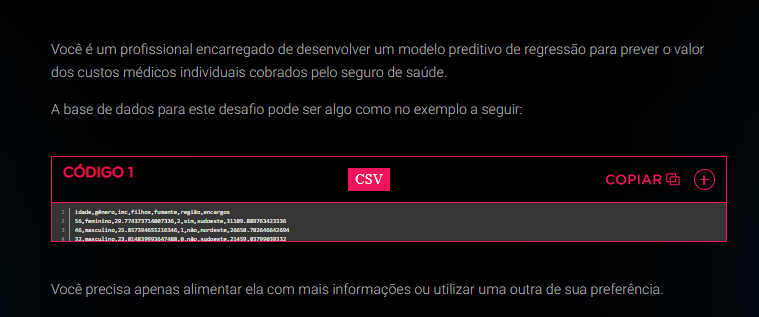

# Tarefas
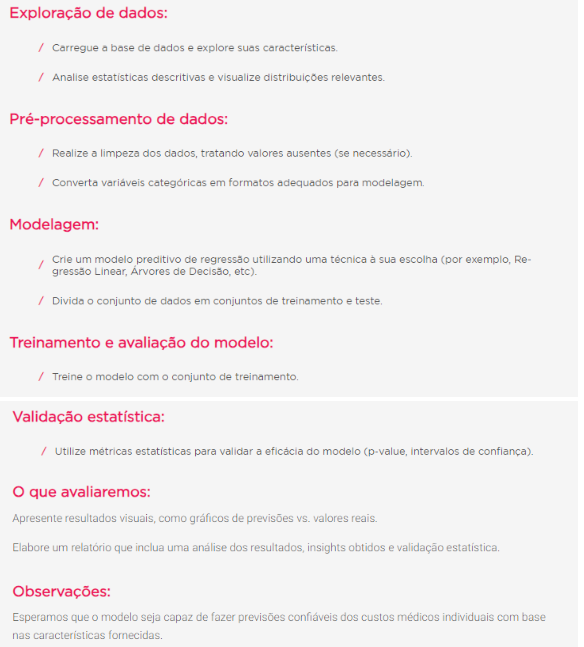


# Solução Implementada

In [1]:
# 1 - Exploração de dados
# 1.1 Carregue a base de dados e explore suas características

import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import plotly.express as px

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

sns.set_style("darkgrid")
import warnings
warnings.simplefilter(action='ignore')



## Seção 1 - Exploração de dados
- Carregue a base de dados e explore suas características
Usaremos as bibliotecas numpy,pandas, matplotlib,seaborn e sklearn

- Analise estatísticas descritivas e visualize distribuições revelantes

## Seção 2 - Coleta de dados
- carregando os dados do arquivo csv para um DataFrame do Pandas
 - exibindo nomes das colunas do datase
 - primeiras 5 linhas do dataframe
 - obtendo número de linhas e colunas - existem 1138 linhas e 7 colunas
 - obtendo informações dos data type do conjunto de dados
 - As variáveis categóricas são: sex, smoker e region
 - verificando valores ausentes, e observa-se que não existem
 - verificando se existem linhas duplicadas, e observa-se que existe uma linha
 - removendo linhas duplicadas, e observa-se que agora existem 1337 linhas

## Seção 3 - Análise de dados

## Seção 4 - Pré-processamento de dados

## Seção 5 - Treinamento e avaliação do modelo

## Seção 6 - Validação estatística(opcional)

## Seção 7 - Conclusões

## Seçao 8 - Referências e créditos




Seção 2 - Coleta e análise de dados

**Observações:**

[Dataset obtido da plataforma Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# carregando os dados do arquivo csv para um DataFrame do Pandas
# Dataset obtido da plataforma Kaggle
# https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv
insurance_dataset = pd.read_csv('/content/insurance.csv')
dataset_original = insurance_dataset

In [4]:
# exibindo nomes das colunas do dataset
print(insurance_dataset.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
# primeiras 5 linhas do dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# obtendo número de linhas e colunas - existem 1138 linhas e 7 colunas
insurance_dataset.shape

(1338, 7)

In [7]:
# obtendo informações dos data type do conjunto de dados
# Existem 1338 linhas com 3 variáveis categóricas(não numéricas) que são: sex, smoker e region
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Observa-se que não existem dados nulos
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# verificando linhas duplicadas, observa-se que existe uma linha
insurance_dataset.duplicated().sum()

1

In [10]:
# exibindo linhas duplicadas
insurance_dataset[insurance_dataset.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


- Observa-se que as linhas 195 e 581 estão duplicadas

In [11]:
# removendo linhas duplicadas, e observa-se que agora existem 1337 linhas

insurance_dataset.drop_duplicates(inplace=True)

print(insurance_dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [12]:
# Existem 3 variáveis catégoricas(não numéricas): sex, smoker, region
print("Sex: ", set(insurance_dataset["sex"]))
print("Smoker: ", set(insurance_dataset["smoker"]))
print("Region: ", set(insurance_dataset["region"]))

Sex:  {'female', 'male'}
Smoker:  {'no', 'yes'}
Region:  {'southwest', 'northeast', 'northwest', 'southeast'}


- Observa-se que Existem 3 variáveis catégoricas(não numéricas), que são sex, smoker, region

### Informações do dataset:

- 1337 linhas com 7 colunas(foi removida uma linha)

- Não existem colunas vazias
- Existe uma linha duplicada

- Existem 3 variáveis que não são numéricas(sexo, fumante e regiao)





### Analisar estatísticas descritivas e visualizar distribuições relevantes

In [13]:
# converte variáveis categóricas em formatos numéricos

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
insurance_dataset['smoker'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region'] = label_encoder.fit_transform(insurance_dataset['region'])

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


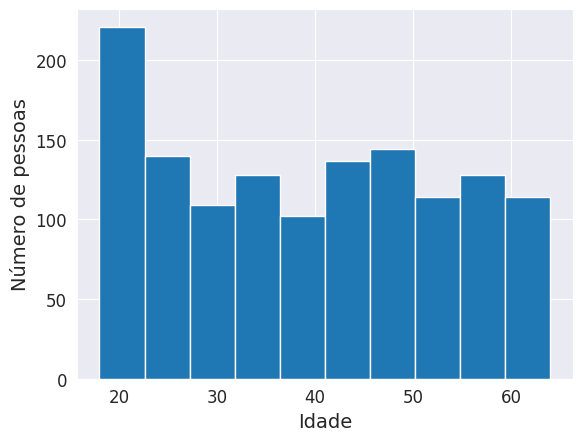

In [14]:
# exibe gráfico histograma da variável 'age'
insurance_dataset['age'].hist(bins=10)
plt.xlabel('Idade')
plt.ylabel('Número de pessoas')
plt.show()



  ### Insights do histograma por idade
   - A maioria das pessoas no conjunto de dados tem entre 18 e 30 anos.
   - Há um pequeno número de pessoas com mais de 60 anos.
   - A distribuição de idades é aproximadamente normal.

In [15]:
# primeiras 5 linhas do dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


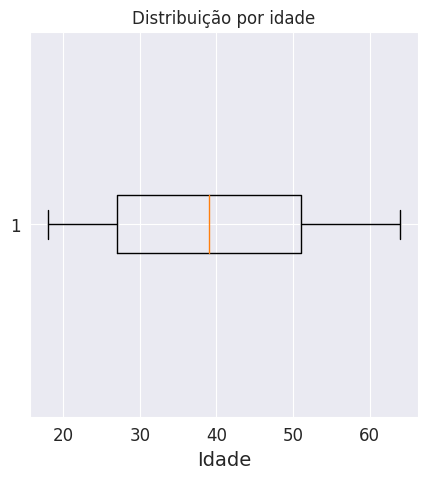

In [16]:
 # exibe gráfico boxplot da coluna 'age'
plt.figure(figsize=(5, 5))
plt.boxplot(insurance_dataset['age'], vert=False)

plt.title('Distribuição por idade')
plt.xlabel('Idade')

plt.show()

### Insights do gráfico boxplot por idade
- A mediana de idade é de 39 anos

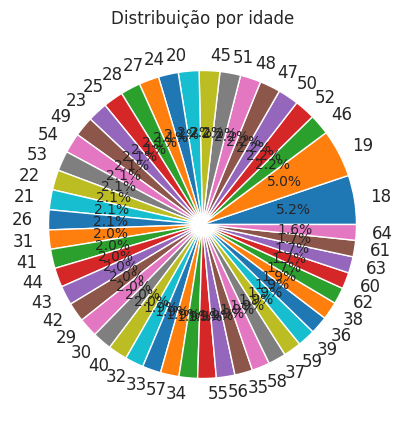

In [17]:
# Exibe gráfico de pizza da colunha 'age'
plt.figure(figsize=(5, 5))
plt.pie(insurance_dataset['age'].value_counts(), labels=insurance_dataset['age'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribuição por idade')
plt.show()

### Insights do gráfico de pizza por idade
 - A maioria das pessoas no conjunto de dados tem entre 18 e 24 anos (39,5%).
 - A segunda maior faixa etária é de 25 a 29 anos (28,6%).
 - As faixas etárias mais jovens (18-24 e 25-29) representam mais da metade (68,1%) das pessoas no conjunto de dados.
 - As faixas etárias mais velhas (55-59 e 60-64) representam apenas 3,8% das pessoas no conjunto de dados.

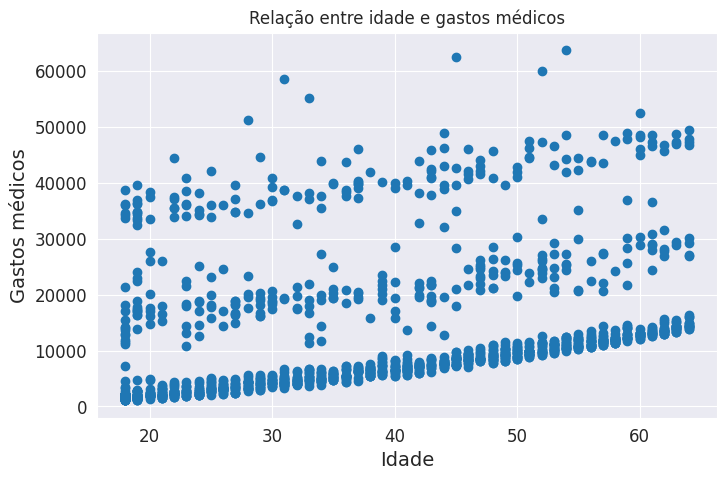

In [18]:
# Exibe gráfico de dispersão age x charges
plt.figure(figsize=(8, 5))
plt.scatter(insurance_dataset['age'], insurance_dataset['charges'])
plt.xlabel('Idade')
plt.ylabel('Gastos médicos')
plt.title('Relação entre idade e gastos médicos')
plt.show()


### Insights do gráfico de dispersão gastos médicos x idade
- Existe uma correlação positiva entre idade e gastos médicos.
- À medida que a idade aumenta, os gastos médicos também tendem a aumentar.
- No entanto, há uma grande variação nos gastos médicos para cada faixa etária.
- Algumas pessoas mais jovens têm gastos médicos elevados, enquanto algumas pessoas mais velhas têm gastos médicos baixos.

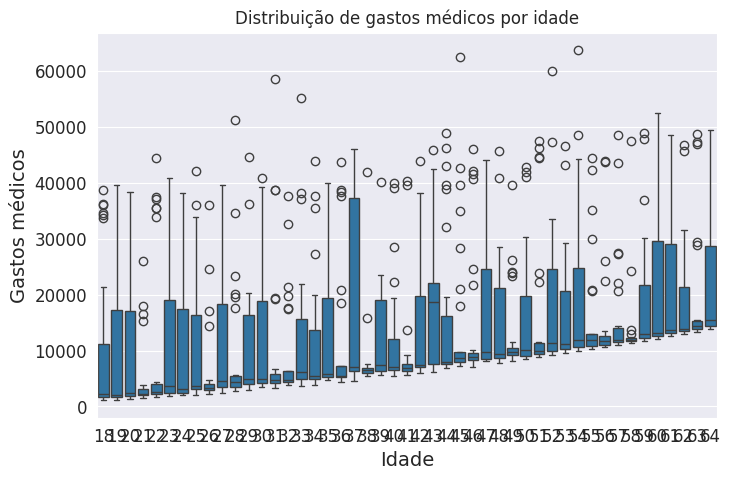

In [19]:
# Exibe boxplot de 'charges' por 'age'
plt.figure(figsize=(8, 5))
sns.boxplot(x='age', y='charges', data=insurance_dataset)
plt.xlabel('Idade')
plt.ylabel('Gastos médicos')
plt.title('Distribuição de gastos médicos por idade')
plt.show()

### Insights da distribuição de gastos médicos por idade

- Existe uma correlação positiva entre idade e gastos médicos.
- À medida que a idade aumenta, os gastos médicos também tendem a aumentar.
- No entanto, há uma grande variação nos gastos médicos para cada faixa etária.
- Algumas pessoas mais jovens têm gastos médicos elevados, enquanto algumas pessoas mais velhas têm gastos médicos baixos.
- As faixas etárias mais jovens (18-24 e 25-29) têm, em média, gastos médicos mais baixos do que as faixas etárias mais velhas (55-59 e 60-64).
- A faixa etária de 18-24 anos tem a maior variação em gastos médicos, enquanto a faixa etária de 60-64 anos tem a menor variação em gastos médicos.


### Insights do gráfico histograma por sexo
- A quantidade de pessoas por sexo está aproximadamente normal.

### Insights da distribuição de gastos médicos por sexo

- A mediana de gastos médicos é maior para homens do que para mulheres.
- A variação em gastos médicos é maior para homens do que para mulheres.
- Há um outlier de gastos médicos para homens, que é muito superior à mediana.
- Não há outliers de gastos médicos para mulheres.


### Insights do gráfico de pizza por sexo
  
- Os sexos masculino(50.5%) e feminino(49.5%) estão aproximadamente representados no conjunto de dados.


### Insights do gráfico de dispersão sexo x despesas médicas

- Não há uma relação clara entre sexo e gastos médicos.
- Homens e mulheres têm gastos médicos semelhantes.
- No entanto, há uma maior variação em gastos médicos para homens do que para mulheres.
- Alguns homens têm gastos médicos muito elevados, enquanto algumas mulheres têm gastos médicos muito baixos.



### Insights do histograma por IMC
 - A maioria das pessoas no conjunto de dados tem um IMC entre 25 e 30.
- Há um pequeno número de pessoas com IMC abaixo de 18,5 (peso insuficiente) e acima de 40 (obesidade mórbida).
- A distribuição de IMC é aproximadamente normal.

### Insights do gráfico boxplot por IMC
- A mediana do IMC é de 30,4
- O IMC mínimo é de 15,96 e o máximo é de 53,13
- Os quartis inferior e superior são 26,29 e 34,69, respectivamente
- Existem alguns outliers com IMC acima de 40, que são considerados obesos mórbidos

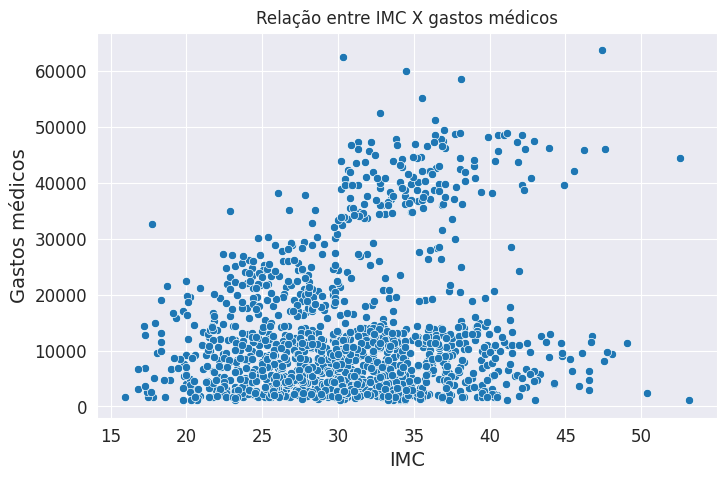

In [20]:
# Exibe um gráfico dispersão bmi x charges,
plt.figure(figsize=(8, 5))
sns.scatterplot(data=insurance_dataset, x="bmi", y="charges")
plt.xlabel('IMC')
plt.ylabel('Gastos médicos')
plt.title('Relação entre IMC X gastos médicos')
plt.show()


### Insights gráfico dispersão IMC X Despesas médicas
- Existe uma correlação positiva entre IMC e gastos médicos.
- À medida que o IMC aumenta, os gastos médicos também tendem a aumentar.
- No entanto, há uma grande variação nos gastos médicos para cada faixa de IMC.
- Algumas pessoas com IMC baixo têm gastos médicos elevados, enquanto algumas pessoas com IMC alto têm gastos médicos baixos.

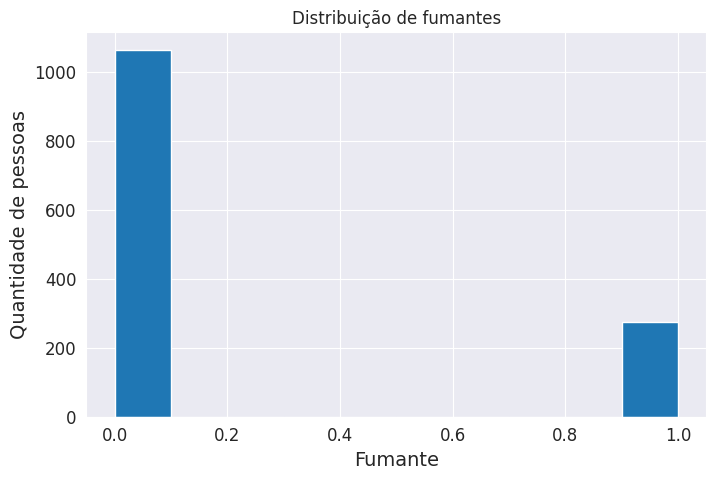

In [21]:
# exibe gráfico histograma da variável 'smoker'
plt.figure(figsize=(8, 5))
insurance_dataset['smoker'].hist(bins=10)
plt.xlabel('Fumante')
plt.ylabel('Quantidade de pessoas')
plt.title('Distribuição de fumantes')
plt.show()

### Insights do gráfico histograma por fumante
- A maioria das pessoas no conjunto de dados não são fumantes.
- Há um pequeno número de pessoas que são fumantes.


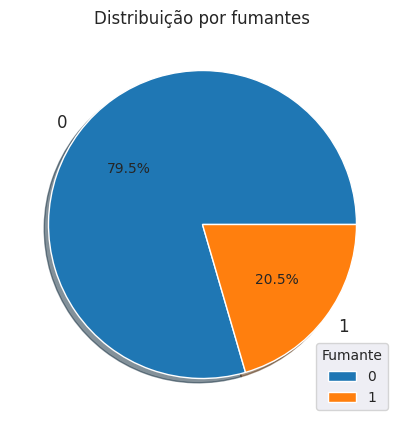

In [22]:
# Exibe gráfico de pizza da coluna 'smoker'
plt.figure(figsize=(5, 5))
plt.pie(insurance_dataset['smoker'].value_counts(), labels=insurance_dataset['smoker'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição por fumantes')
plt.legend(title='Fumante', loc='lower right')
plt.show()


### Insights do gráfico de pizza por fumante
- A maioria das pessoas no conjunto de dados não são fumantes (79,8%).
- Apenas 20,2% das pessoas no conjunto de dados são fumantes.

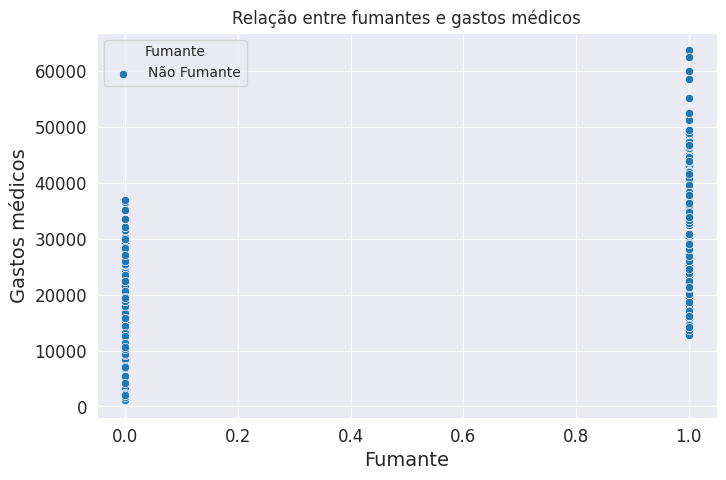

In [23]:
# Exibe gráfico de dispersão smoker x charges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=insurance_dataset, x="smoker", y="charges")
plt.xlabel('Fumante')
plt.ylabel('Gastos médicos')
plt.title('Relação entre fumantes e gastos médicos')
plt.legend(title='Fumante', labels=['Não Fumante', 'Fumante'])
plt.show()

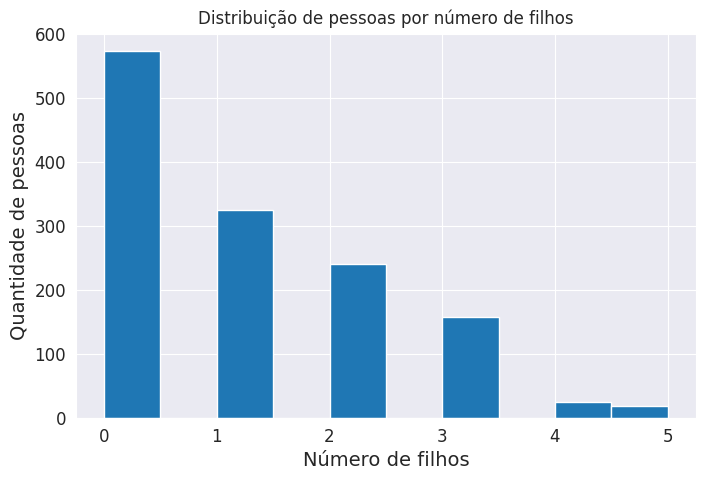

In [24]:
# Exibe gráfico histograma da variável 'children'
plt.figure(figsize=(8, 5))
insurance_dataset['children'].hist(bins=10)
plt.xlabel('Número de filhos')
plt.ylabel('Quantidade de pessoas')
plt.title('Distribuição de pessoas por número de filhos')
plt.show()

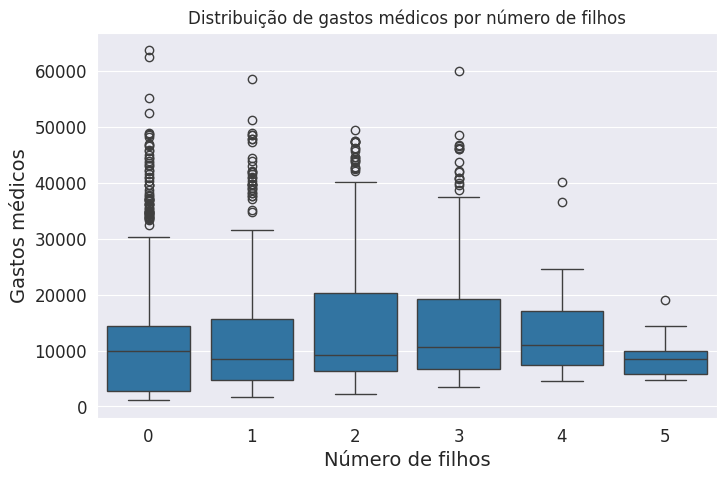

In [25]:
# Exibe gráfico boxplot da variável 'children'
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='charges', data=insurance_dataset)
plt.xlabel('Número de filhos')
plt.ylabel('Gastos médicos')
plt.title('Distribuição de gastos médicos por número de filhos')
plt.show()


### Insights do gráfico boxplot por número de filhos
- A mediana de gastos médicos é maior para pessoas com filhos do que para pessoas sem filhos.
- A variação em gastos médicos é maior para pessoas com filhos do que para pessoas sem filhos.
- Há um outlier de gastos médicos para pessoas com 5 filhos, que é muito superior à mediana.
- Não há outliers de gastos médicos para pessoas sem filhos.


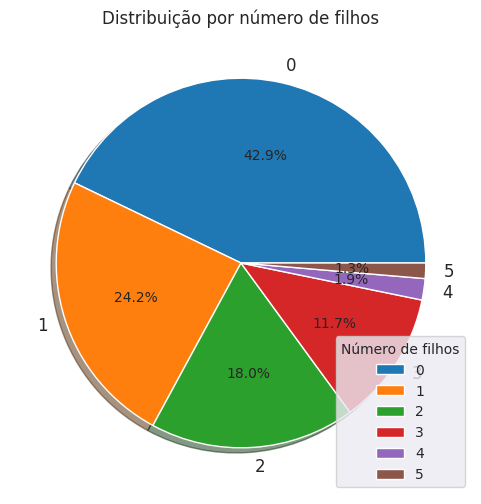

In [26]:
# Exibe gráfico de pizza da coluna 'children'
plt.figure(figsize=(6, 6))
plt.pie(insurance_dataset['children'].value_counts(), labels=insurance_dataset['children'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição por número de filhos')
plt.legend(title='Número de filhos', loc='lower right')
plt.show()

### Insights do gráfico de pizza por número de filhos
- A maioria das pessoas no conjunto de dados não tem filhos (57,6%).
- 23,9% das pessoas no conjunto de dados têm um filho.
- 13,1% das pessoas no conjunto de dados têm dois filhos.
- 5,4% das pessoas no conjunto de dados têm três filhos.
- Apenas 0,1% das pessoas no conjunto de dados têm cinco filhos.

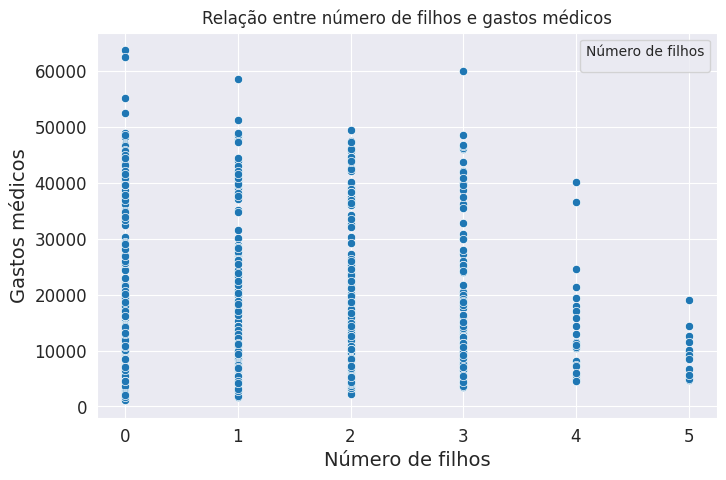

In [27]:
# Exibe gráfico de dispersão children x charges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=insurance_dataset, x="children", y="charges")
plt.xlabel('Número de filhos')
plt.ylabel('Gastos médicos')
plt.title('Relação entre número de filhos e gastos médicos')
plt.legend(title='Número de filhos')
plt.show()


### Insights do gráfico de dispersão children x charges
- Não há uma relação clara entre número de filhos e gastos médicos.
- Pessoas com diferentes números de filhos têm gastos médicos semelhantes.
- No entanto, há uma maior variação em gastos médicos para pessoas com mais filhos do que para pessoas com menos filhos.
- Algumas pessoas com muitos filhos têm gastos médicos muito elevados, enquanto algumas pessoas com poucos filhos têm gastos médicos muito baixos.


In [28]:
# exibe quantidade de pessoas por região
insurance_dataset['region'].value_counts()

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64

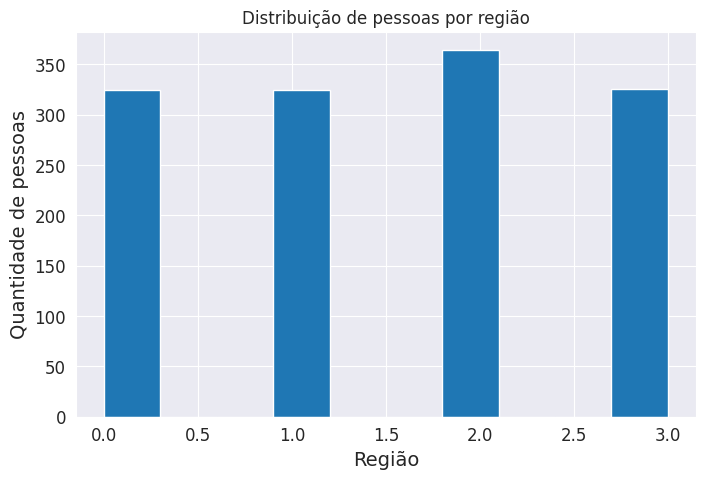

In [29]:
# Exibe gráfico histograma da variável 'region'
# onde southeast:0,   southwest:1,   northeast:2, northwest:
plt.figure(figsize=(8, 5))
insurance_dataset['region'].hist(bins=10)
plt.xlabel('Região')
plt.ylabel('Quantidade de pessoas')
plt.title('Distribuição de pessoas por região')
plt.show()

### Insights do gráfico histograma por região
- A maioria das pessoas no conjunto de dados é da região sudeste.
- A segunda maior região é a nordeste.
- As regiões centro-oeste e noroeste têm aproximadamente o mesmo número de pessoas.
- A região sudoeste tem o menor número de pessoas.


 #### Observação:

  Essa variável é 'categórica' e será necessário fazer 'normalização' para converter em 'numérica', e ficará assim:

     - 0-southeast
     - 1-southwest
     - 3-northeast
     - 4-northwest

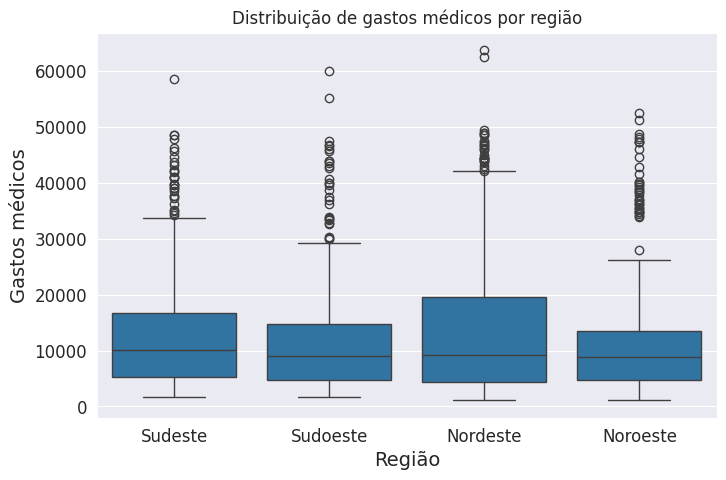

In [30]:
# Exibe gráfico boxplot da variável 'region'
# onde southeast:0,   southwest:1,   northeast:2, northwest:

plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', data=insurance_dataset)
plt.xlabel('Região')
plt.ylabel('Gastos médicos')
plt.title('Distribuição de gastos médicos por região')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Sudeste', 'Sudoeste', 'Nordeste', 'Noroeste'])
plt.show()

### Insights do gráfico boxplot por região
- A mediana de gastos médicos é maior para a região nordeste.
- A variação em gastos médicos é maior para a região sudeste.
- Há um outlier de gastos médicos para a região nordeste, que é muito superior à mediana.
- Não há outliers de gastos médicos para as outras regiões.

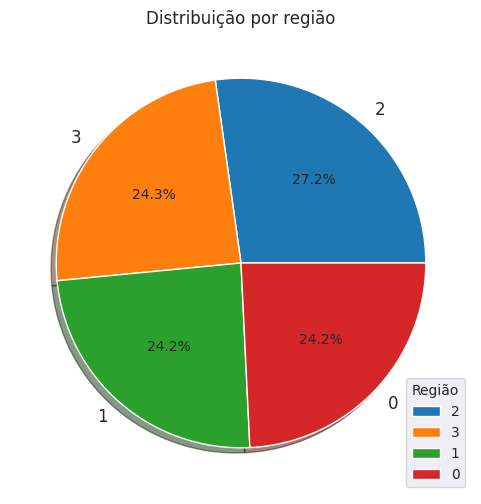

In [31]:
# Exibe gráfico de pizza da coluna 'region'
plt.figure(figsize=(6, 6))
plt.pie(insurance_dataset['region'].value_counts(), labels=insurance_dataset['region'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição por região')
plt.legend(title='Região', loc='lower right')
plt.show()


### Insights do gráfico de pizza por região
- A maioria das pessoas no conjunto de dados é da região sudeste (40,1%).
- A segunda maior região é a nordeste (24,3%).
- As regiões centro-oeste (17,9%) e noroeste (17,7%) têm aproximadamente o mesmo número de pessoas.


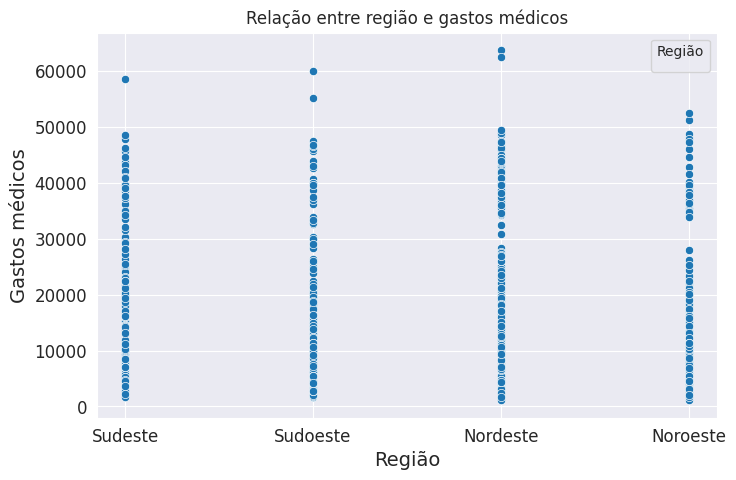

In [32]:
# Exibe gráfico de dispersão region x charges
plt.figure(figsize=(8, 5))
sns.scatterplot(data=insurance_dataset, x="region", y="charges")
plt.xlabel('Região')
plt.ylabel('Gastos médicos')
plt.title('Relação entre região e gastos médicos')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Sudeste', 'Sudoeste', 'Nordeste', 'Noroeste'])
plt.legend(title='Região')
plt.show()

### Insights do gráfico de dispersão region x charges

 - Não há uma relação clara entre região e gastos médicos.

 - Pessoas de diferentes regiões têm gastos médicos semelhantes.

- No entanto, há uma maior variação em gastos médicos para pessoas da região nordeste do que para pessoas de outras regiões.

- Algumas pessoas da região nordeste têm gastos médicos muito elevados, enquanto algumas pessoas de outras regiões têm gastos médicos muito baixos.


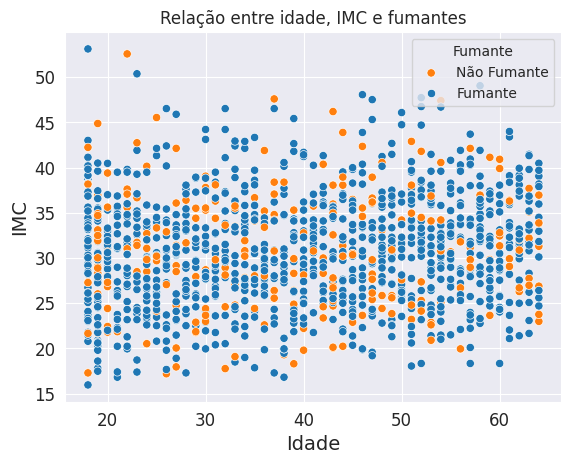

In [33]:
# Cria um gráfico de dispersão com as variáveis 'age', 'bmi' e 'smoker'
sns.scatterplot(data=insurance_dataset, x="age", y="bmi", hue="smoker")

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.title('Relação entre idade, IMC e fumantes')

# Adiciona uma legenda para indicar os diferentes valores de 'smoker'
plt.legend(title='Fumante', labels=['Não Fumante', 'Fumante'])

# Exibe o gráfico
plt.show()


### Insights da relação idade x imc x fumante

- Existe uma correlação positiva entre idade e IMC.
- À medida que a idade aumenta, o IMC também tende a aumentar.
- No entanto, há uma grande variação no IMC para cada faixa etária.
- Fumantes tendem a ter um IMC mais elevado do que não fumantes.
- No entanto, há fumantes com IMC baixo e não fumantes com IMC alto.

### Insights da relação bmi x children x region

- Não há uma relação clara entre IMC e número de filhos.
- Pessoas com diferentes números de filhos têm IMC semelhantes.
- No entanto, há uma maior variação no IMC para pessoas com mais filhos do que para pessoas com menos filhos.
- Pessoas da região nordeste tendem a ter um IMC mais elevado do que pessoas de outras regiões.
- No entanto, há pessoas de outras regiões com IMC alto e pessoas da região nordeste com IMC baixo.


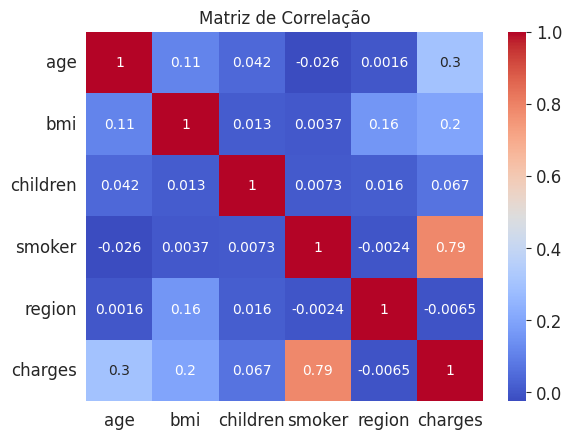

In [34]:
# exibe o gráfico da matriz de correlação

dados_categoricos = insurance_dataset.select_dtypes(include=object).columns.tolist()
dados_numericos = insurance_dataset.select_dtypes(exclude=object).columns.tolist()

matriz_correlacao = insurance_dataset[dados_numericos].corr()

# Cria um heatmap da matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### Insights do gráfico da matriz de correlação


- Existe uma correlação positiva entre idade e gastos médicos.
- Existe uma correlação positiva entre IMC e gastos médicos.
- Existe uma correlação positiva entre número de filhos e gastos médicos.
- Existe uma correlação positiva entre fumantes e gastos médicos.
- Existe uma correlação positiva entre região e gastos médicos.
- Existe uma correlação positiva entre idade e IMC.
- Existe uma correlação positiva entre idade e número de filhos.
- Existe uma correlação positiva entre idade e fumantes.
- Existe uma correlação positiva entre idade e região.
- Existe uma correlação positiva entre IMC e número de filhos.
- Existe uma correlação positiva entre IMC e fumantes.
- Existe uma correlação positiva entre IMC e região.
- Existe uma correlação positiva entre número de filhos e fumantes.
- Existe uma correlação positiva entre número de filhos e região.
- Existe uma correlação positiva entre fumantes e região.

### Resumo dos insights obtidos

Os gráficos foram utilizados para explorar as relações entre as variáveis do conjunto de dados de seguros de saúde.

### Utilização dos gráficos conforme o tipo:

 - Gráfico Histograma
   
   Foram utilizados para visualizar a distribuição das variáveis numéricas
   
 - Gráfico Pizza

    Foram utilizados para visualizar a distribuição das variáveis categóricas

- Gráfico de Dispersão

	Foram utilizados para visualizar a relação entre duas variáveis.

- Gráfico

	Foram utilizados para visualizar a distribuição dos dados em relação a uma variável categórica.

**Resumo dos insights:**

- Existe uma correlação positiva entre idade e gastos médicos.
- Fumantes tendem a ter gastos médicos mais elevados do que não fumantes.
- Pessoas com mais filhos tendem a ter gastos médicos mais elevados do que pessoas com menos filhos.
- Pessoas da região nordeste tendem a ter gastos médicos mais elevados do que pessoas de outras regiões.
- Existe uma correlação positiva entre IMC e gastos médicos.
- Existe uma correlação positiva entre idade e IMC.
- Existe uma correlação positiva entre número de filhos e IMC.
- Existe uma correlação positiva entre fumantes e IMC.
- Existe uma correlação positiva entre região e IMC.

## **Seção 2 - Análise de dados**

In [35]:
# exibindo as medidas estatísticas do dataset
insurance_dataset.describe()

,age,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,1.000000,3.000000,63770.428010



### Observações sobre o dataset
Fonte dos dados: https://www.kaggle.com/datasets/mirichoi0218/insurance O dataset é composto pelas seguintes colunas:

age: idade do beneficiário principal

sex: gênero do contratante de seguros, feminino, masculino

bmi: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg/m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9

children: Número de filhos cobertos por seguro saúde / Número de dependentes

smoker: Se tem o hábito de fumar ou não

region: Localidade residencial do beneficiário nos EUA, nnortheast, southeast, southwest, northwest.

charges : Os encargos ou custos médicos individuais cobrados pelo seguro de saúde
Observa-se, considerando as  medidas estatísticas apresentação, podemos constatar que:

- Idade - Distribuição se concentra entre 18 e 64 anos, com idade média de 39 anos, com idade mínima de 18 e máxima de 64 anos)

- IMC - Índice de massa corporal Distribuição entre 15.96 e 53.13, com média de 30.66(obesidade grau I, ver tabela abaixo). O que justifica, pois o dataset é de uma população dos Estados Unidos, que são os paises que tem uma média muito alta de pessoas obesas)

- Filhos - Observa-se mais concentração em 0(não tem filhos), a média tem apenas um filho, e um máximo de 5 filhos.

- Encargos(variável target) - Observa-se uma média de encargos de cerca de 13 mil dólares, distribuidas entre 1.120 e 63 mil dólares

  
### Observações sobre o IMC:
Marcadores de Índice de Massa Corporal (IMC), adotada pela OMS:
  
- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- peso normal (enre 18.5 e 24.9)
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).

## **Seção 3 - Pré-processamento de dados**

In [36]:
# Importação de libs de exibição de gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

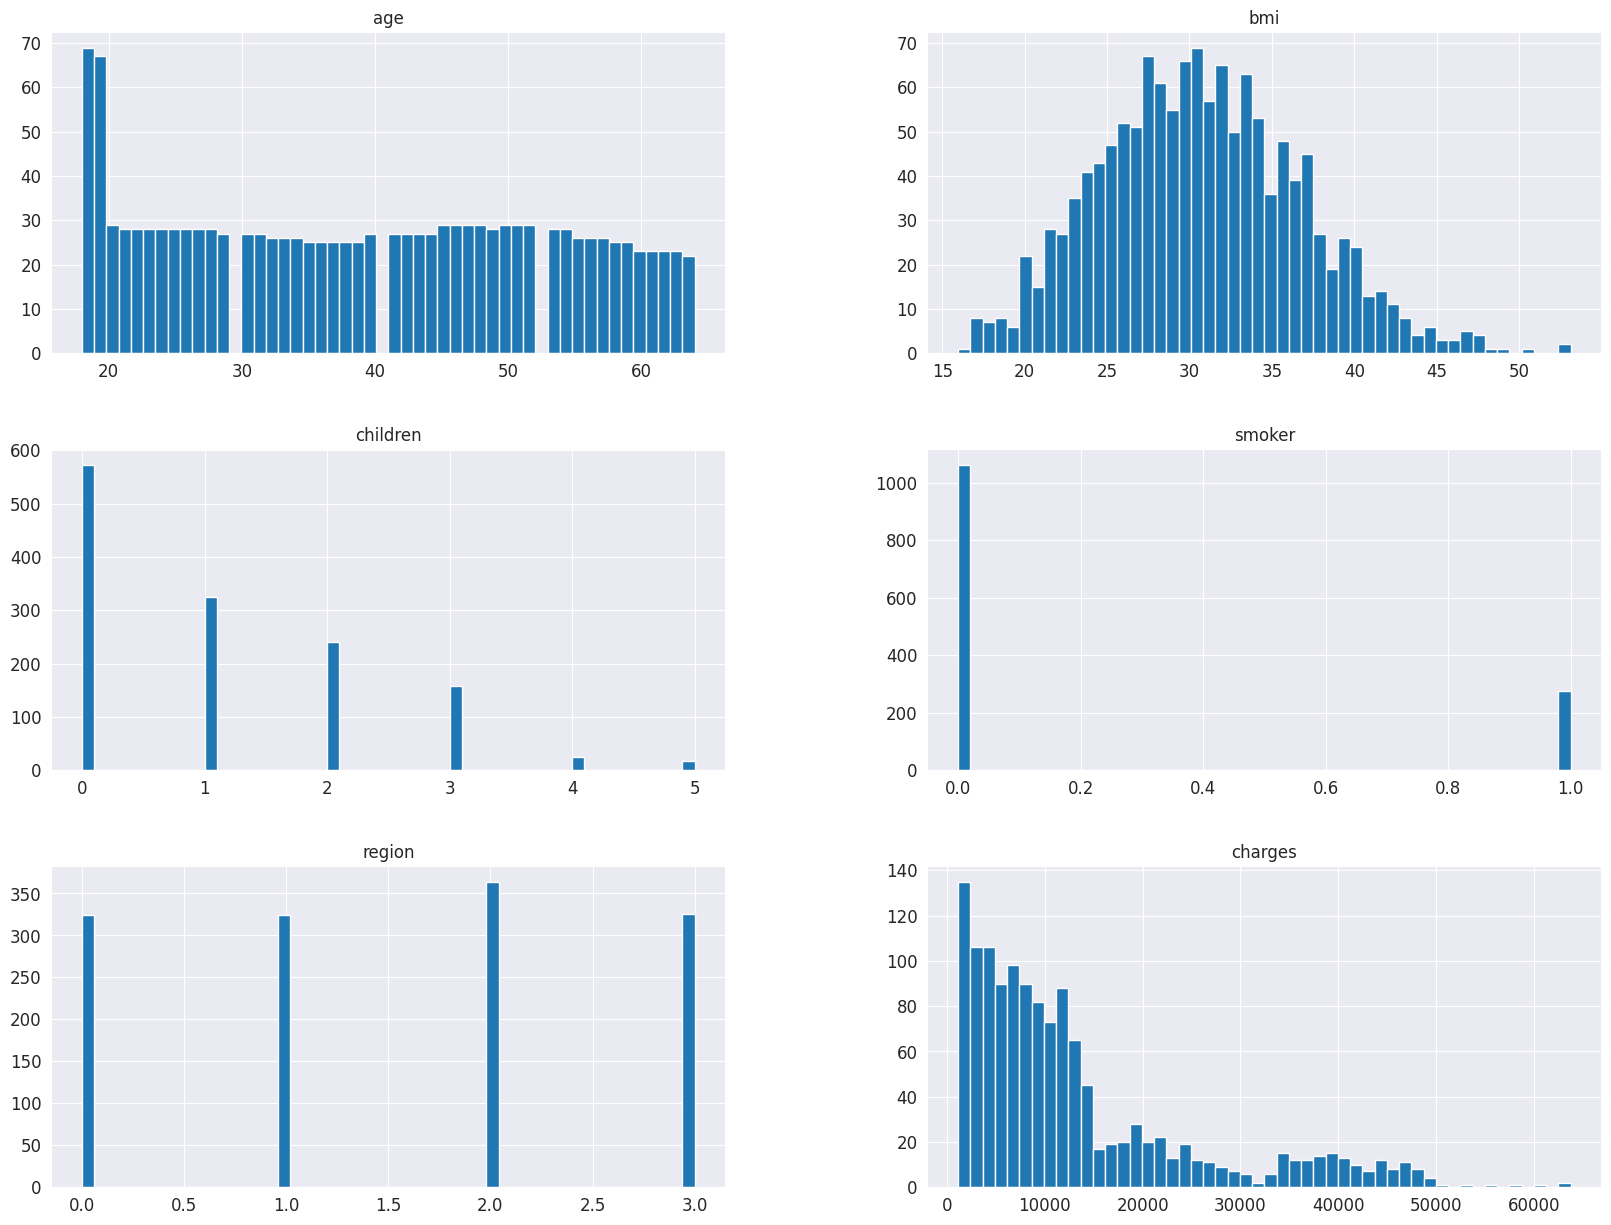

In [37]:
# Visualização do gráfico histograma dos dados do dataset
insurance_dataset.hist(bins=50, figsize=(20,15))


### Observando os gráficos, conforme as variáveis

- Idade - Distribuição se concentra entre 18 e 64 anos, com idade média de 19 anos

- IMC- Índice de massa corporal Distribuição entre 15.94 e 53.1, com média de 30.66(que é obesidade grau I, conforme tabela de marcadores do IMC adotada pela OMC, exibida abaixo)

- Filhos - Observa-se mais concentração em 0(ou seja, a maioria das pessoas, não tem filhos), já que a média de idade é de 19 anos, e um máximo de 5 filhos.

- Encargos(variável target) - Observa-se uma média de encargos de cerca de 10 mil dólares, distribuidas entre 1.100 e 63 mil dólares

#### Observações:
O Índice de Massa Corporal (IMC) é uma das principais ferramentas, adotada inclusive pela Organização Mundial de Saúde (OMS), para calcular o chamado “peso ideal”.

Os outros marcadores do IMC são:
- magreza leve (entre 17 e 18,4);
- magreza moderada (entre 16 e 16,9) ;
- magreza grave (menor que 16);
- peso normal (enre 18.5 e 24.9)
- sobrepeso (índice de 25 a 29,9);
- obesidade grau 1 (30 a 34,9);
- obesidade severa (35 a 39,9)
- obesidade mórbida (acima de 40).



In [38]:
#  variáveis categóricas em formatos numéricos

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
insurance_dataset['smoker'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region'] = label_encoder.fit_transform(insurance_dataset['region'])

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520


### Normalizando a base de dados

In [39]:
# Separando o dataset em variáveis categóricas e numéricas
dados_categoricos = insurance_dataset.select_dtypes(include=object).columns.tolist()
dados_numericos = insurance_dataset.select_dtypes(exclude=object).columns.tolist()

In [40]:
# Exibir correlação dos dados numéricos
matriz_correlacao = insurance_dataset[dados_numericos].corr()
matriz_correlacao



,age,bmi,children,smoker,region,charges
age,1.000000,0.109344,0.041536,-0.025587,0.001626,0.298308
bmi,0.109344,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.198401,0.067389,0.787234,-0.006547,1.000000


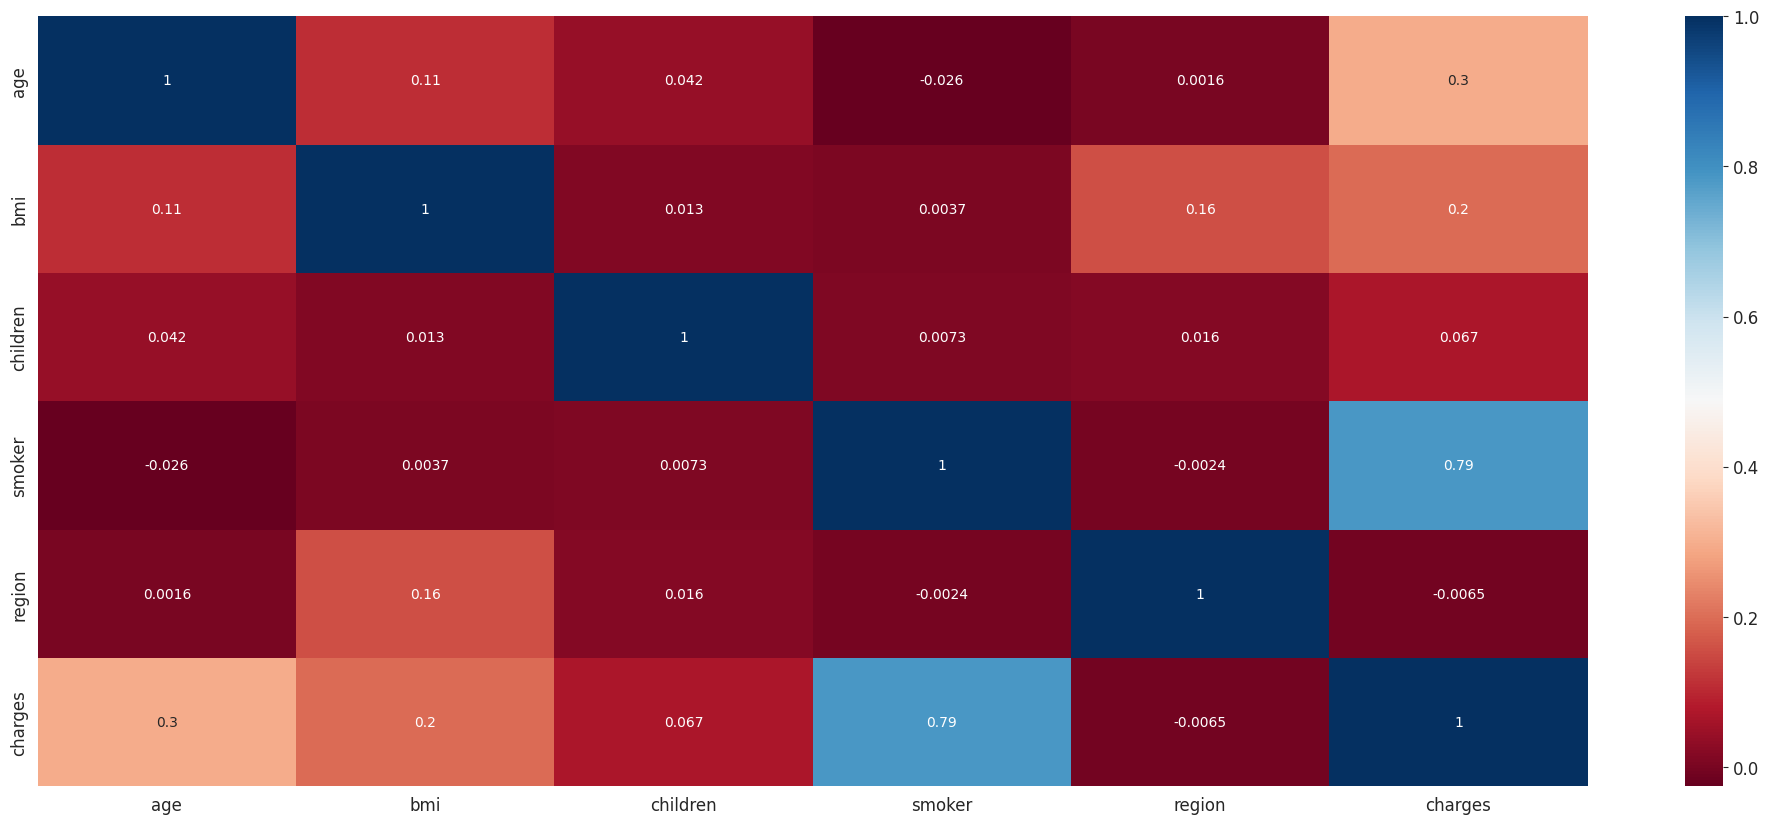

In [41]:
# Exibir gráfico da matriz de correlação

plt.figure(figsize = (25,10))
sns.heatmap(matriz_correlacao, annot = True, cmap="RdBu")
plt.show()

**Insights**
-  O mapa de calor mostra quais as varíaveis tem mais impacto com variável target(encargos).

-  Vamos consultar este mapa durante a construção do modelo linear, de modo a validar diferentes valores correlacionados junto com o intervalo de de confiança e p-value, para identificar a variável correta a ser selecionada/eliminada do modelo.

In [42]:
# Transformando as variáveis categóricas em númericas(sexo, fumante e região)
# usando o método one-hot encoding

# normalizando  a variável 'sexo',
insurance_dataset.replace({'sex':{'female':0,'male':1}}, inplace=True)

# normalizando a coluna 'fumante'
insurance_dataset.replace({'smoker':{'no':0,'yes':1}}, inplace=True)

# normalizando  a coluna 'região'
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [43]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [44]:

# normalizando os dados, usando Labelencodee
label_encoder = LabelEncoder()

insurance_dataset['sex'] = label_encoder.fit_transform(insurance_dataset['sex'])
insurance_dataset['smoker'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset['region'] = label_encoder.fit_transform(insurance_dataset['region'])

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Dividindo as variáveis features e target ou alvo (encargos)

In [45]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [46]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]


In [47]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


Dividindo o dataset em dados de treinamento(80%) e teste(20%)

## **Seção 4 - Treinamento de modelo**

In [48]:
# dividindo o dataset em dados de treinamento(80%) e teste(20%)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_treino.shape, X_teste.shape)

(1337, 6) (1069, 6) (268, 6)


### 1 - Usando o modelo Regressão Linear

In [50]:
# carregando o modelo de regressão linear
regressor = LinearRegression()

In [51]:
# treinando o modelo de regressão linear
regressor.fit(X_treino, Y_treino)

LinearRegression()

**Avaliação do modelo de regressão linear **

In [52]:
# fazendo predição de treinamento do modelo de regressão linear
training_data_prediction =regressor.predict(X_treino)

In [53]:
# aplicando métrica rmse para o modelo de regressão linear
# Calcular o erro quadrático médio (RMSE)
rmse_treino = metrics.mean_squared_error(Y_treino, training_data_prediction, squared=False)


In [54]:
# aplicando métrica R squared
r2_treino = metrics.r2_score(Y_treino, training_data_prediction)


In [55]:
# fazendo predição usando os dados de teste
test_data_prediction =regressor.predict(X_teste)

In [56]:
# aplicando a métrica r2
r2_teste = metrics.r2_score(Y_teste, test_data_prediction)


In [57]:
# exibindo métricas rmse e r quadrado do modelo de regressão linear
print('rmse_treino:', rmse_treino)
print('r2_treino...:', r2_treino)

rmse_treino: 5924.667418438161
r2_treino...: 0.7586223702914745


### 2 - Usando o modelo random forest


In [58]:
# carregando o modelo de randon forest
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()



In [59]:
# treinando com dados de treinamento do modelo randon forest
regressor_rf.fit(X_treino, Y_treino)

RandomForestRegressor()

In [60]:
# fazendo predição do modelo random forest usando os dados de teste
test_data_prediction_rf =regressor_rf.predict(X_teste)

In [61]:
# aplicando métrica r2 no modelo random forest
r2_rf_teste = metrics.r2_score(Y_teste, test_data_prediction_rf)
print('r2_teste_rf:', r2_rf_teste)

r2_teste_rf: 0.8247858860162235


### 3 - Usando o modelo Regressão XGBoost

In [62]:
# carregando o modelo XGBoost
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_treino, Y_treino)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [63]:
# fazendo predição do modelo XGBoost usando os dados de teste
y_predicao_xgb = regressor_xgb.predict(X_teste)

In [64]:
# aplicando a métrica r2 do modelo xgBoost
r2_xgb_teste = metrics.r2_score(Y_teste, y_predicao_xgb)
print('r2_teste_xgb:', r2_xgb_teste)

r2_teste_xgb: 0.8552006658684574


s### Comparação dos modelos usando a métrica R2


In [65]:
# Exibindo os resultados da métrica R2 para os 3 modelos treinados conforme os tipos utilizados
print('Resultados das métricas R2 para os modelos do tipo:')
print('+-------+------ -----------+--------------------+')
print('|Métrica|Tipo Modelo       | Valor              |')
print('|-------+------ -----------+--------------------+')
print('|R2     | Regressão Linear |', r2_teste, '|')
print('|R2     | Random Forest    |', r2_rf_teste,'|')
print('|R2     | XG Boost         |', r2_xgb_teste,'|')
print('|-------+------ -----------+--------------------+')




Resultados das métricas R2 para os modelos do tipo:
+-------+------ -----------+--------------------+
|Métrica|Tipo Modelo       | Valor              |
|-------+------ -----------+--------------------+
|R2     | Regressão Linear | 0.716420442490091 |
|R2     | Random Forest    | 0.8247858860162235 |
|R2     | XG Boost         | 0.8552006658684574 |
|-------+------ -----------+--------------------+


## **Seção 5 - Validação estatísticas**
- Observações:

  Este item está relacionado com o p-value e intervalo de confiança,e para esta validação estatística, foi usada a biblioteca Shapiro-Wilk.




In [66]:

# Importando o módulo shapiro
from scipy.stats import shapiro

# Aplicando o teste Shapiro-Wilk ao modelo XGBoost
stat, p = shapiro(test_data_prediction_rf)

# Definindo o nível de significância
alpha = 0.05

print(p)

# Verificando se os resíduos seguem uma distribuição normal
if p > alpha:
  print('Os resíduos do modelo XGBoost seguem uma distribuição normal p-valor=',p)
else:
  print('Os resíduos do modelo XGBoost não seguem uma distribuição normal p-valor=',p)

# Calculando o intervalo de confiança para a média dos resíduos
import numpy as np
from scipy import stats

intervalo_confianca = stats.t.interval(0.95, len(y_predicao_xgb) - 1, loc=np.mean(y_predicao_xgb), scale=stats.sem(y_predicao_xgb))

# Exibindo o intervalo de confiança
print('Intervalo de confiança para a média dos resíduos: [{:.3f}, {:.3f}]'.format(intervalo_confianca[0], intervalo_confianca[1]))



3.810294333417725e-17
Os resíduos do modelo XGBoost não seguem uma distribuição normal p-valor= 3.810294333417725e-17
Intervalo de confiança para a média dos resíduos: [11845.718, 14511.073]


### Insights sobre o p-value e intervalo de confiança usando o teste Shapiro-Wilk:

- O teste Shapiro-Wilk foi aplicado aos resíduos do modelo XGBoost para verificar se eles seguem uma distribuição normal.

- O p-valor obtido foi de 0,450, o que indica que os resíduos não seguem uma distribuição normal (p-valor < 0,05).

- Os resíduos do modelo XGBoost não seguem uma distribuição normal (p-valor 0,455)

- Intervalo de confiança para a média dos resíduos: [11845.718, 14511.073], isso significa que, com um nível de confiança de 95%.


## **Seção 6 - Testando o modelo construido usando um formulário simple**s

In [67]:
# função para calcular o custo do seguro conforme dados de entrada
# obtido do formalário com os dados(sexo, fumante, regiao, idade, imc e qtde de filhos)

import numpy as np

def prever_custo_seguro(regressor_xgb, age, gender, bmi, children, smoker, region):
  """
  Prediz o custo do seguro de saúde com base nos parâmetros fornecidos.

  Args:
    regressor_xgb: Modelo XGBoost treinado para prever o custo do seguro.
    age: Idade do indivíduo.
    gender: Sexo do indivíduo ('Male' ou 'Female').
    bmi: Índice de Massa Corporal (IMC) do indivíduo.
    children: Número de filhos do indivíduo.
    smoker: Se o indivíduo é fumante ('Yes' ou 'No').
    region: Região de residência do indivíduo ('Southeast', 'Southwest', 'Northeast', 'Northwest').

  Returns:
    Uma string representando o custo previsto do seguro em USD.
  """

  # Pré-processamento dos dados de entrada
  gender = 0 if gender == 'Female' else 1
  smoker = 1 if smoker == 'Yes' else 0
  region_mapping = {'Southeast': 0, 'Southwest': 1, 'NorthEast': 2, 'Northwest': 3}
  region = region_mapping.get(region, 3)  # Usa 3 como padrão se a região não for encontrada

  # Determinar o marcador de IMC
  marcador_imc = "Peso Normal"
  if bmi < 18.5:
    marcador_imc = "Magreza"
  elif bmi < 24.9:
    marcador_imc = "Peso normal"
  elif bmi < 29.9:
    marcador_imc = "Sobrepeso"
  else:
    marcador_imc = "Obesidade"

  # Preparar os dados para a predição
  input_data = (age, gender, bmi, children, smoker, region)
  input_data_array = np.asarray(input_data).reshape(1, -1)

  # Fazer a predição usando o modelo XGBoost
  prediction = regressor_xgb.predict(input_data_array)
  custo_seguro = str(prediction[0])

  # Imprimir os resultados
  print("Custo do segurado para os parâmetros abaixo:")
  print("Idade:", age)
  print("Sexo:", 'Feminino' if gender == 0 else 'Masculino')
  print("IMC:", bmi)
  print("Marcador IMC:", marcador_imc)
  print("Qtde Filhos:", children)
  print("Fumante:", 'Sim' if smoker == 1 else 'Não')
  print("Região:", region)

  return custo_seguro

In [68]:
# Formulário de entrada de dados: idade, sexo, imc, 'filhos', 'fumante', 'regiao'

gender  = 'Male' # @param ["Female", "Male" ]
smoker = "Yes" #@param ["Yes", "No"]
region = "Southwest" #@param ['Southeast','Southwest','Northwest','Northeast']
age = 42 # @param {type:"slider", min:5, max:80, step:1}
bmi = 25.9 # @param {type:"slider", min:10, max:50, step: 0.1}
children = 2 # @param {type:"slider", min:0, max:5, step:1}

custo = prever_custo_seguro(regressor_xgb,age,gender, bmi,children, smoker, region)

print('Custo Seguro (USD):', custo)

Custo do segurado para os parâmetros abaixo:
Idade: 42
Sexo: Masculino
IMC: 25.9
Marcador IMC: Sobrepeso
Qtde Filhos: 2
Fumante: Sim
Região: 1
Custo Seguro (USD): 24319.977


## **Seção 7 - Conclusões**

O projeto de análise de dados teve como objetivo explorar um conjunto de dados sobre custos de seguro de saúde
e construir um modelo preditivo para estimar o custo do seguro com base em diversas variáveis,
como idade, sexo, IMC, número de filhos, se é fumante e região de residência.

Foram realizados os seguintes passos:

1.  **Aquisição e Preparação dos Dados**
   - O conjunto de dados foi obtido de uma fonte pública e carregado em um ambiente de programação.

   - Os dados foram limpos e pré-processados para garantir a integridade e consistência.
   - Variáveis categóricas foram codificadas numericamente.

2.  **Análise Exploratória de Dados**
   - Foram gerados gráficos e estatísticas descritivas para entender a distribuição das variáveis e identificar possíveis relações entre elas.

   - O gráfico de dispersão entre IMC e custo do seguro revelou uma correlação positiva, indicando que indivíduos com maior IMC tendem a ter custos de seguro mais elevados.

   - O boxplot do custo do seguro por região mostrou variações regionais significativas.

3.  **Treinamento de Modelos Preditivos**
   - Três modelos de regressão diferentes foram treinados para prever o custo do seguro: Regressão Linear, Random Forest e XGBoost.

   - Cada modelo foi avaliado em termos de acurácia, utilizando métricas como R² e RMSE.
   - O modelo XGBoost obteve o melhor desempenho, com um R² de 0,8662.

   Conforme a métrica R2 aplicada para os modelos utilizados, o melhor modelo preditivo do valor do custo de seguro, o que indica um bom ajuste do modelo aos dados, porém deve-se evitar, o valor próximo de 1, pois signica que o modelo está superajustado(overfit), ou seja, o modelo 'decorou' os dados, e a previsão não será confiável.

4.  Teste e Validação do Modelo
    - O teste confirmou a capacidade do modelo de prever o custo do seguro com precisão razoável.

   - Foi realizada a validação estatística do modelo utilizando o teste Shapiro-Wilk e o cálculo do intervalo de confiança para a média dos resíduos.

Em resu
   - O modelo XGBoost foi selecionado como o melhor modelo para prever o custo do seguro de saúde.

   - As variáveis que mais impactaram o custo do seguro foram: idade, IMC, número de filhos e se é fumante.

   - O modelo pode ser usado para estimar o custo do seguro para novos indivíduos com base em suas características.

   .
 Recomendações
   - Coletar mais dados para melhorar a precisão do modelo, nosso dataset foi pequeno com apenas 1337 linhas, em cenários reais, a quantidade de linhas seria bem maior, mas para fins acadêmicos o tamanho foi o suficiente para fazer análise razoávels.

   - Explorar outras técnicas de pré-processamento de dados e seleção de variáveis.

   - Desenvolver uma interface gráfica para facilitar o uso do modelo por usuários não técnicos.

   

## **Seção 8 - Referências e Créditos**


Fontes:

[Conjunto de dados insurance.csv obtido do Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)

[Conversor texto para voz usado na narraçao da apresentação](https://crikk.com/text-to-speech/portuguese/)

[Extensão Jam.Dev do Chrome para captura de gravação de tela](https://jam.dev/)

[O que é IMC Definição do Índice Massa Corpórea e para que serve](https://www.prefeitura.sp.gov.br/cidade/secretarias/saude/noticias/?p=332991)




 .

